In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from kid_readout.measurement import basic, plot_basic
from kid_readout.measurement.io import npy
from kid_readout.analysis.resonator import lmfit_resonator

In [80]:
save_directory = '/home/flanigan/temp/'
save_loss_i_and_loss_c_versus_readout_power = True

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-12-07_112856_mmw_readout_power.npd/')

In [4]:
npd.node_names()

['SweepStreamList0',
 'ADCSnap1',
 'SweepStreamList2',
 'ADCSnap3',
 'SweepStreamList4',
 'ADCSnap5',
 'SweepStreamList6',
 'ADCSnap7',
 'SweepStreamList8',
 'ADCSnap9',
 'SweepStreamList10',
 'ADCSnap11',
 'SweepStreamList12',
 'ADCSnap13',
 'SweepStreamList14',
 'ADCSnap15',
 'SweepStreamList16',
 'ADCSnap17',
 'SweepStreamList18',
 'ADCSnap19',
 'SweepStreamList20',
 'ADCSnap21',
 'SweepStreamList22',
 'ADCSnap23',
 'SweepStreamList24',
 'ADCSnap25',
 'SweepStreamList26',
 'ADCSnap27',
 'SweepStreamList28',
 'ADCSnap29',
 'SweepStreamList30',
 'ADCSnap31',
 'SweepStreamList32',
 'ADCSnap33',
 'SweepStreamList34',
 'ADCSnap35',
 'SweepStreamList36',
 'ADCSnap37',
 'SweepStreamList38',
 'ADCSnap39',
 'SweepStreamList40',
 'ADCSnap41',
 'SweepStreamList42',
 'ADCSnap43',
 'SweepStreamList44',
 'ADCSnap45',
 'SweepStreamList46',
 'ADCSnap47']

In [5]:
all_ssl = [npd.read(name) for name in npd.node_names() if name.startswith('SweepStreamList')]
all_snap = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

# Temperatures

In [6]:
package_color = 'C0'
eccosorb_color = 'C1'
stepper_color = 'C2'
num_ssls = len(all_ssl)

def time_and_temperatures(ssl):
    start_epoch = ssl.start_epoch()
    time = [sa.start_epoch() - start_epoch for sa in scan.sweep_arrays]
    package = [sa.state.temperature.package_ruox4550_temperature for sa in scan.sweep_arrays]
    eccosorb = [sa.state.temperature.eccosorb_diode_temperature for sa in scan.sweep_arrays]
    stepper = [sa.state.temperature.stepper_diode_temperature for sa in scan.sweep_arrays]
    return time, package, eccosorb, stepper

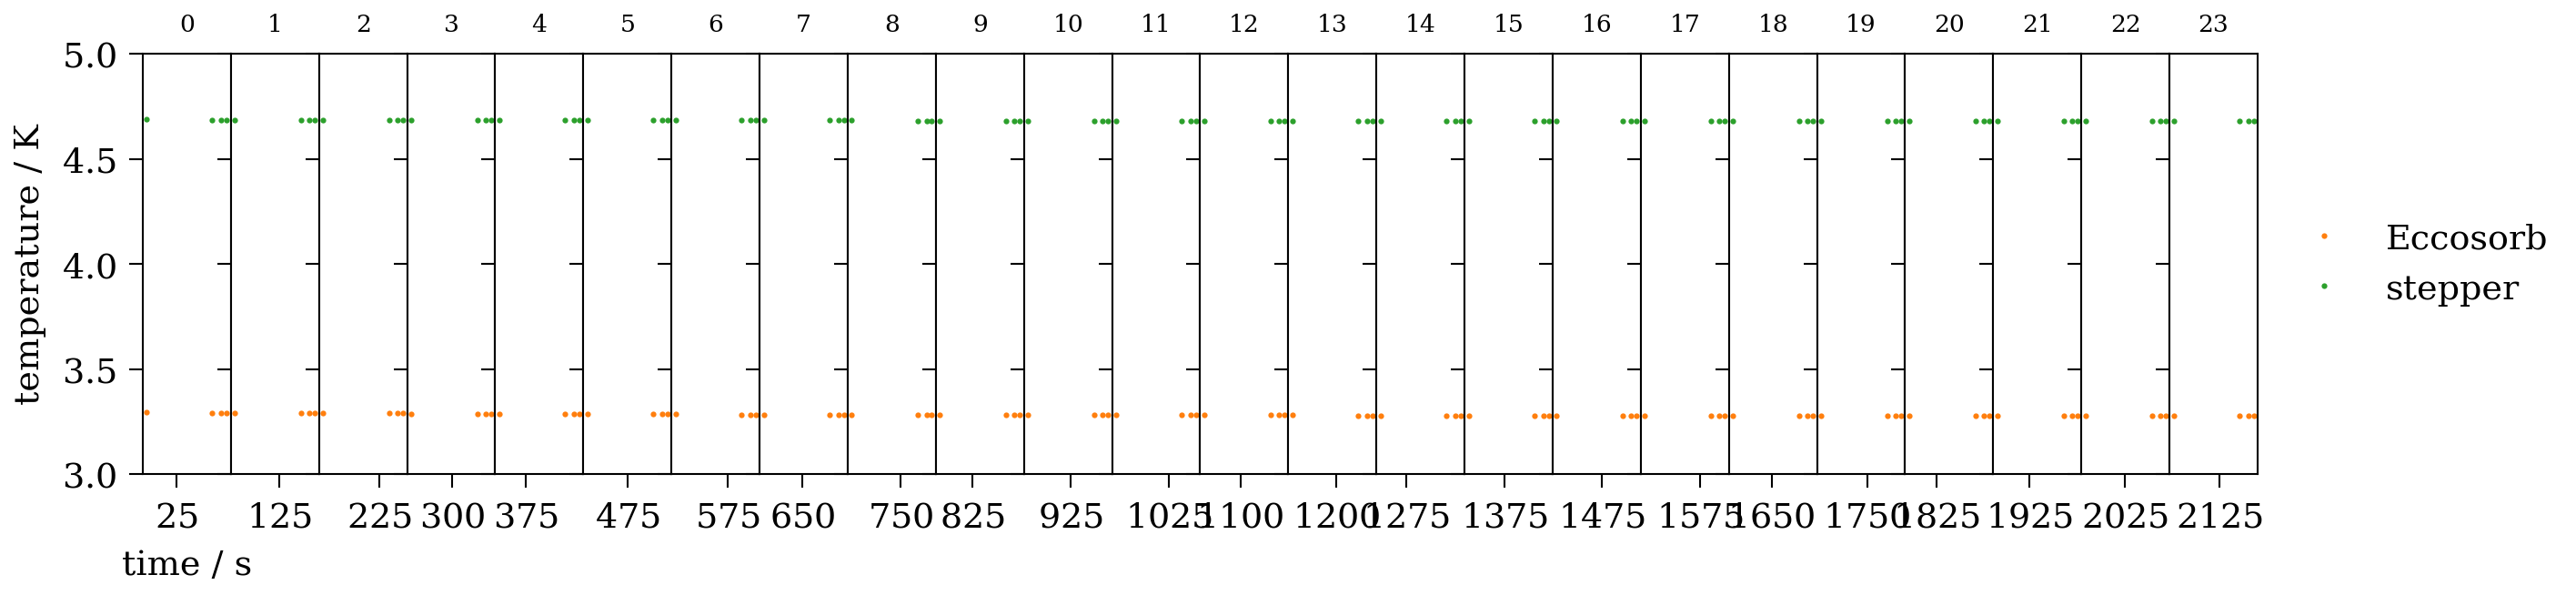

In [7]:
fig, axes = plt.subplots(1, num_ssls, figsize=(10, 2),
                               gridspec_kw={'hspace': 0.4, 'wspace': 0})

t0 = all_ssl[0].start_epoch()
for index, ax in enumerate(axes):
    ssl = all_ssl[index]
    time = ([ssl.sweep.start_epoch() - t0] +
            [stream.epoch - t0 for stream in ssl.stream_list])
    eccosorb = ([ssl.sweep.state.temperature.eccosorb_diode_temperature] + 
                [stream.state.temperature.eccosorb_diode_temperature for stream in ssl.stream_list])
    stepper = ([ssl.sweep.state.temperature.stepper_diode_temperature] + 
                [stream.state.temperature.stepper_diode_temperature for stream in ssl.stream_list])
    ax.plot(time, eccosorb, '.', color=eccosorb_color, label='Eccosorb')
    ax.plot(time, stepper, '.', color=stepper_color, label='stepper')
    ax.set_title(str(index), fontsize='xx-small')

for ax in axes:
    ax.set_ylim(3, 5)
    ax.set_xticks([ax.get_xticks().mean()])
for ax in axes[1:]:
    ax.set_yticklabels([])
axes[0].set_ylabel('temperature / K')
axes[0].set_xlabel('time / s')
axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

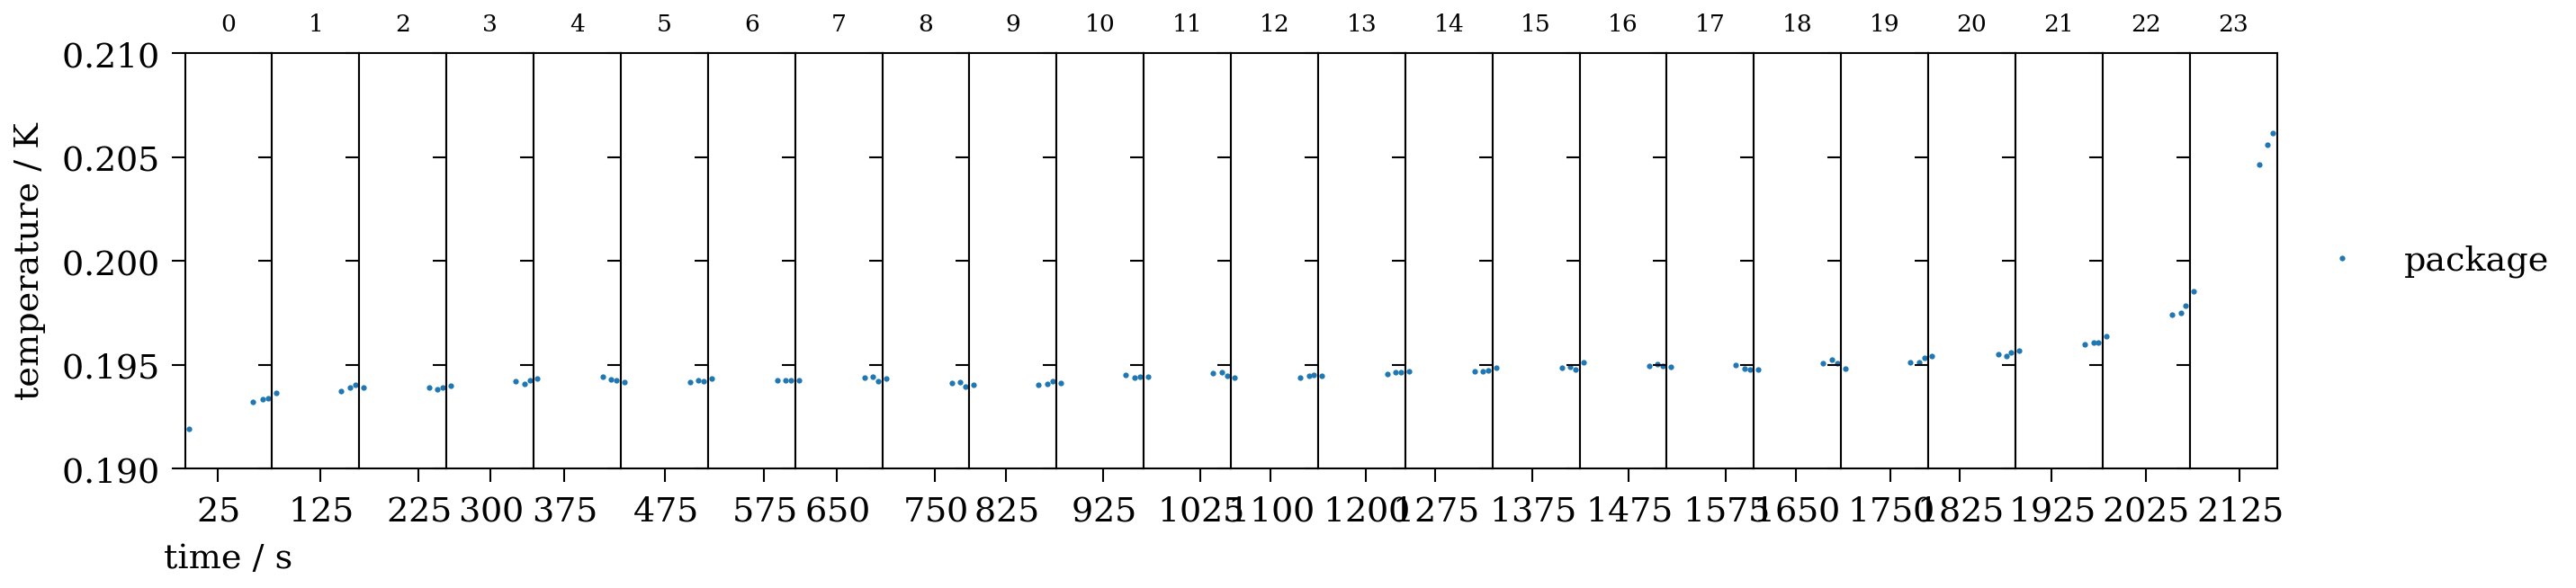

In [8]:
fig, axes = plt.subplots(1, num_ssls, figsize=(10, 2),
                               gridspec_kw={'hspace': 0.4, 'wspace': 0})

t0 = all_ssl[0].start_epoch()
for index, ax in enumerate(axes):
    ssl = all_ssl[index]
    time = ([ssl.sweep.start_epoch() - t0] +
            [stream.epoch - t0 for stream in ssl.stream_list])
    package = ([ssl.sweep.state.temperature.package_ruox4550_temperature] + 
                [stream.state.temperature.package_ruox4550_temperature for stream in ssl.stream_list])
    ax.plot(time, package, '.', color=package_color, label='package')
    ax.set_title(str(index), fontsize='xx-small')

for ax in axes:
    ax.set_ylim(0.190, 0.210)
    ax.set_xticks([ax.get_xticks().mean()])
for ax in axes[1:]:
    ax.set_yticklabels([])
axes[0].set_ylabel('temperature / K')
axes[0].set_xlabel('time / s')
axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Dataframe

In [9]:
all_ssl[0].sweep.to_dataframe()

,analysis_epoch,lockin_detection_harmonic,lockin_identification,lockin_input_configuration,lockin_input_coupling,lockin_input_notch_filter,lockin_input_shield_grounding,lockin_local,lockin_output_filter_slope,lockin_reference_frequency,...,temperature_eccosorb_diode_temperature,temperature_eccosorb_diode_voltage,temperature_package_ruox4550_resistance,temperature_package_ruox4550_temperature,temperature_stepper_diode_temperature,temperature_stepper_diode_voltage,temperature_unix_time,io_class,root_path,node_path
0,1.513016e+09,1,"[Stanford_Research_Systems, SR830, s/n45571, v...",0,1,1,1,0,1,0.001,...,3.293,1.617375,8142.261,0.191924,4.687,1.609074,1.512664e+09,NumpyDirectory,/data/readout/2017-12-07_112856_mmw_readout_po...,/SweepStreamList0/sweep
1,1.513016e+09,1,"[Stanford_Research_Systems, SR830, s/n45571, v...",0,1,1,1,0,1,0.001,...,3.293,1.617375,8142.261,0.191924,4.687,1.609074,1.512664e+09,NumpyDirectory,/data/readout/2017-12-07_112856_mmw_readout_po...,/SweepStreamList0/sweep


In [12]:
dfs = []
for ssl in all_ssl:
    for number in range(ssl.sweep.num_channels):
        ss = ssl.sweep[number]
        ss.fit_resonator(model=lmfit_resonator.LinearLossResonatorWithCable)
        dfs.append(ss.to_dataframe())
        dfs[-1]['band_index'] = ssl.state.band_index
df = pd.concat(dfs, ignore_index=True)
df.shape

(102, 89)

In [14]:
np.unique(df.band_index)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [33]:
print(sorted([c for c in df.columns]))

['analysis_epoch', 'io_class', u'lockin_detection_harmonic', u'lockin_identification', u'lockin_input_configuration', u'lockin_input_coupling', u'lockin_input_notch_filter', u'lockin_input_shield_grounding', u'lockin_local', u'lockin_output_filter_slope', u'lockin_reference_frequency', u'lockin_reference_phase', u'lockin_reference_source', u'lockin_reference_trigger', u'lockin_reserve_mode', u'lockin_rms_voltage', u'lockin_sample_rate', u'lockin_sensitivity', u'lockin_signal_phase', u'lockin_sine_output_voltage', u'lockin_sync_filter', u'lockin_time_constant', u'mmwave_source_after_multiplier', u'mmwave_source_before_multiplier', u'mmwave_source_mickey_ticks', u'mmwave_source_minnie_ticks', u'mmwave_source_multiplier_factor', u'mmwave_source_multiplier_input', u'mmwave_source_ttl_modulation_source', u'mmwave_source_waveguide_twist_angle', 'node_path', 'number', 'res_A_mag', 'res_A_mag_error', 'res_A_slope', 'res_A_slope_error', 'res_Q', 'res_Q_e', 'res_Q_e_imag', 'res_Q_e_imag_error', 

(-1000, 100000.0)

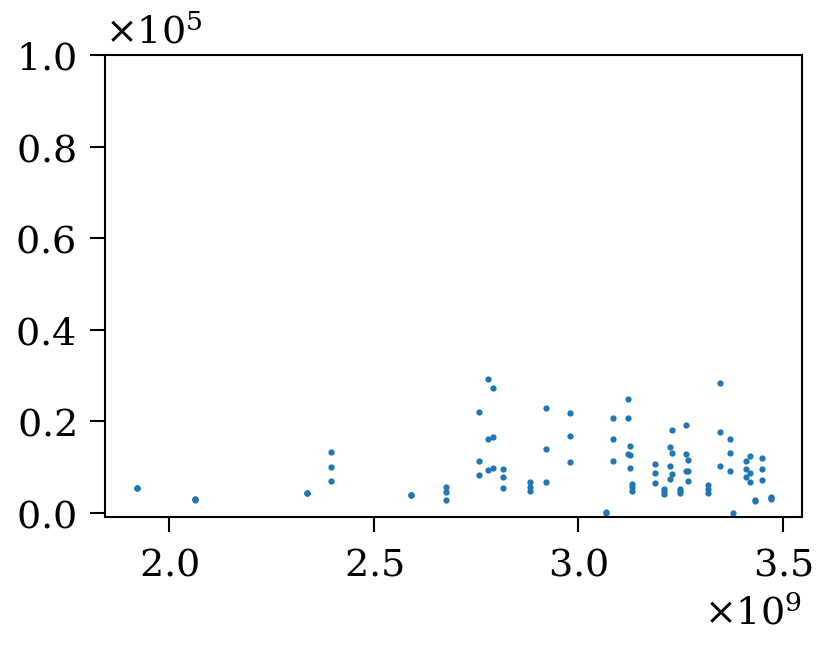

In [17]:
fig, ax = plt.subplots()
ax.plot(df.res_f_0, df.res_Q_i, '.')
ax.set_ylim(-1000, 1e5)

(-1e-06, 0.0005)

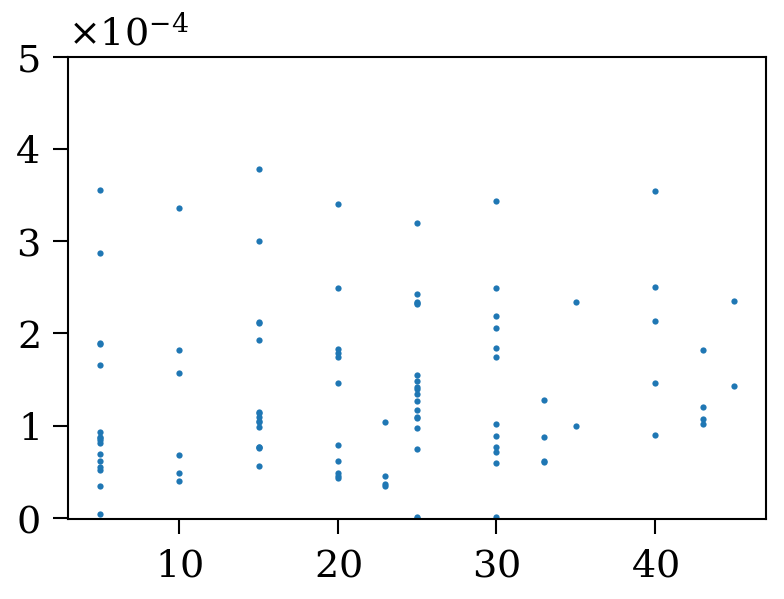

In [21]:
fig, ax = plt.subplots()
ax.plot(df.roach_dac_attenuation, df.res_loss_i, '.')
ax.set_ylim(-1e-6, 5e-4)

In [87]:
df.shape[0] / 3

34.0

In [57]:
df.sort_values(by='roach_dac_attenuation', inplace=True)
good = df[(df.res_redchi < 200) &
          (1e-6 < df.res_loss_i) &
          (df.res_loss_i < 1e-3)]

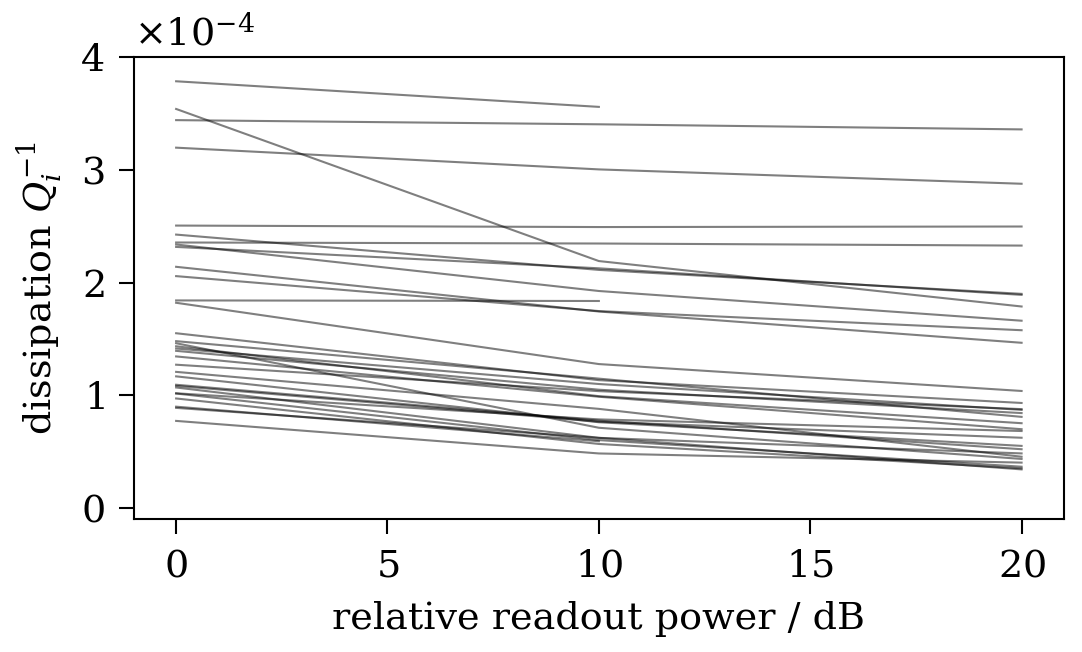

In [58]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_xlabel('relative readout power / dB')
ax.set_ylabel('dissipation $Q_i^{-1}$')
for band_index, band_group in good.groupby('band_index'):
    for number, number_group in band_group.groupby('number'):
        ax.plot(number_group.roach_dac_attenuation.max() - number_group.roach_dac_attenuation,
                number_group.res_loss_i,
                '-k', alpha=0.5)
ax.set_ylim(-1e-5, 4e-4);

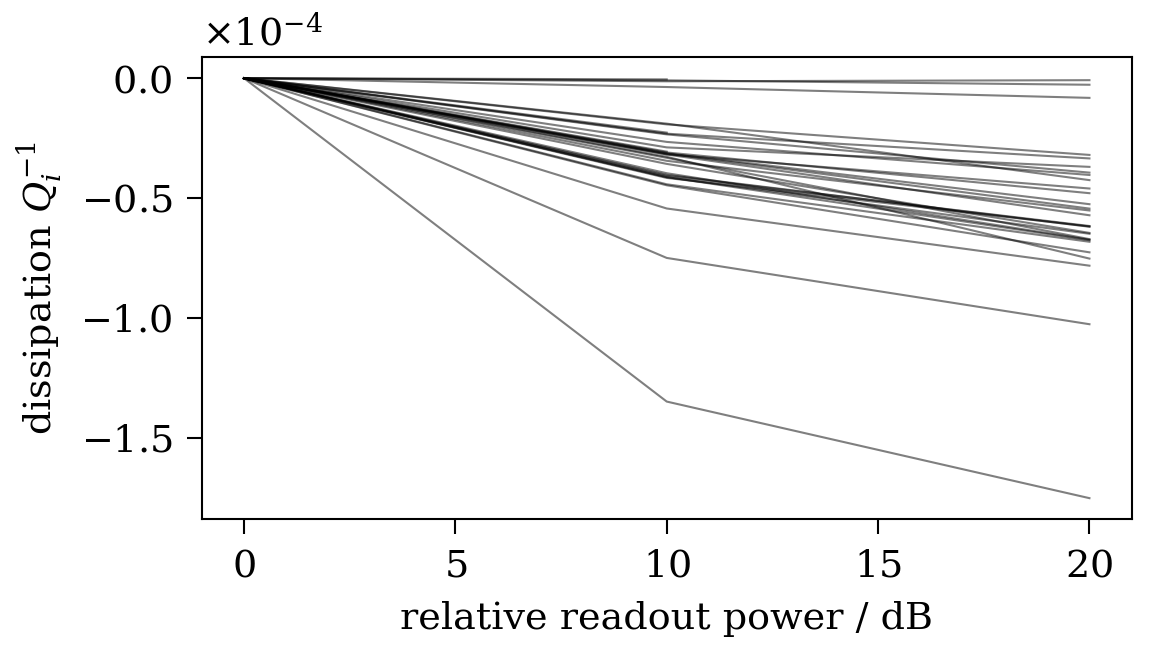

In [92]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_xlabel('relative readout power / dB')
ax.set_ylabel('dissipation $Q_i^{-1}$')
for band_index, band_group in good.groupby('band_index'):
    for number, number_group in band_group.groupby('number'):
        ax.plot(number_group.roach_dac_attenuation.max() - number_group.roach_dac_attenuation,
                number_group.res_loss_i - number_group.res_loss_i.max(),
                '-k', alpha=0.5)
#ax.set_ylim(-1e-5, 4e-4);

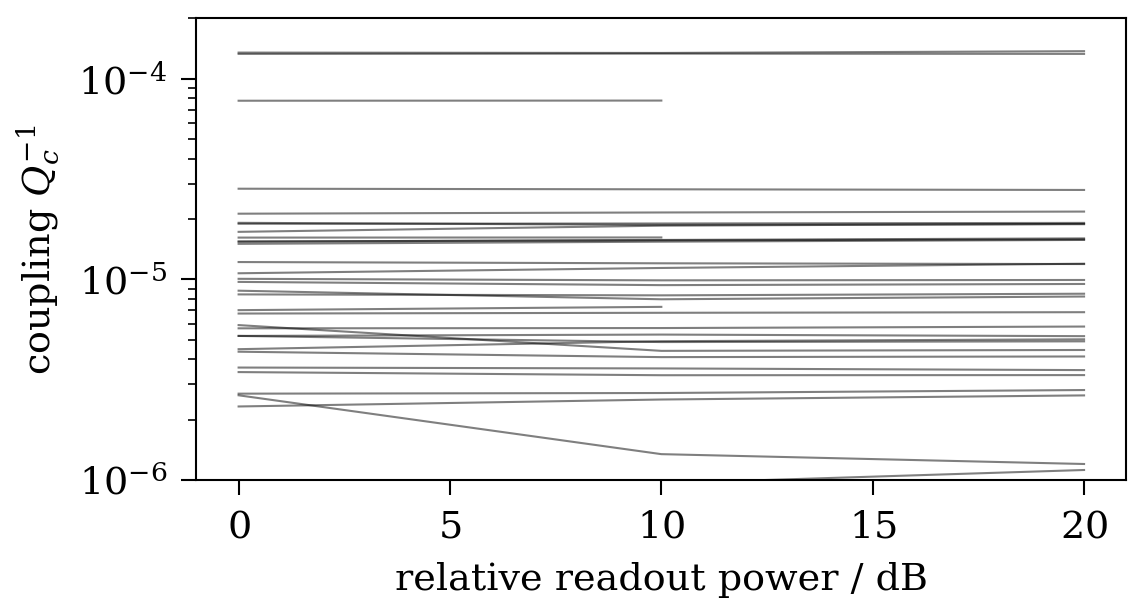

In [61]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_xlabel('relative readout power / dB')
ax.set_ylabel('coupling $Q_c^{-1}$')
for band_index, band_group in good.groupby('band_index'):
    for number, number_group in band_group.groupby('number'):
        ax.plot(number_group.roach_dac_attenuation.max() - number_group.roach_dac_attenuation,
                number_group.res_loss_c,
                '-k', alpha=0.5)
ax.set_ylim(1e-6, 2e-4);
ax.set_yscale('log')

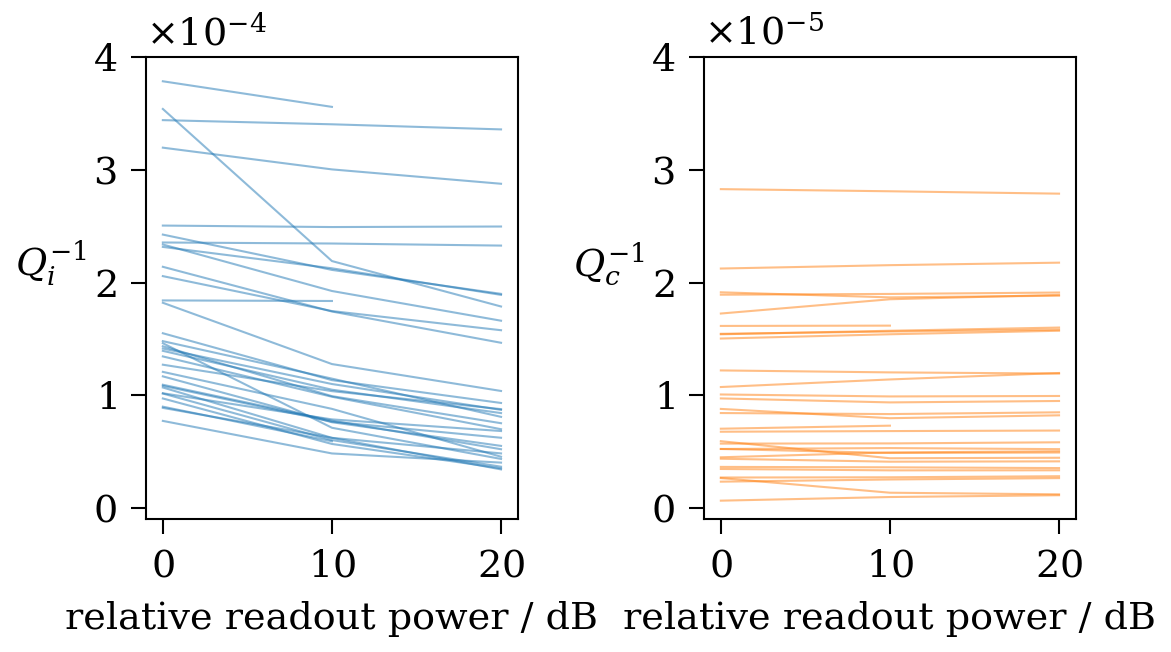

In [83]:
fig, (ax_i, ax_c) = plt.subplots(1, 2, figsize=(4, 2),
                                 gridspec_kw={'wspace': 0.5})
ax_i.set_xlabel('relative readout power / dB')
ax_c.set_xlabel('relative readout power / dB')

ax_i.set_ylabel('$Q_i^{-1}$', rotation='horizontal', labelpad=10)
ax_c.set_ylabel('$Q_c^{-1}$', rotation='horizontal', labelpad=10)
for band_index, band_group in good.groupby('band_index'):
    for number, number_group in band_group.groupby('number'):
        #power = number_group.roach_attenuation.max() - number_group.roach_dac_attenuation
        ax_i.plot(number_group.roach_dac_attenuation.max() - number_group.roach_dac_attenuation,
                  number_group.res_loss_i,
                  '-', color='C0', alpha=0.5)
        ax_c.plot(number_group.roach_dac_attenuation.max() - number_group.roach_dac_attenuation,
                  number_group.res_loss_c,
                  '-', color='C1', alpha=0.5)
ax_i.set_ylim(-1e-5, 4e-4)
ax_c.set_ylim(-1e-6, 4e-5)

if save_loss_i_and_loss_c_versus_readout_power:
    fig.savefig(save_directory + 'loss_i_and_loss_c_versus_readout_power.pdf')